In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import constants

plt.rcParams["font.family"] = "FreeSerif"
plt.rcParams["font.size"] = 13

In [2]:
columns = constants.KEYS + constants.METRICS

metrics = ['wer', 'mer', 'wil', 'wip']
metrics_time = metrics + ['time']

In [3]:
filename = "../results/results"
legends = ["No processing", "Spellchecking (direct)", "Spellchecking (segmentation)", "Spellchecking (compound)", "Threshold (simple)",
          "Threshold (gaussian)", "Threshold (mean)", "Threshold (otsu)", "Blur (average)", "Blur (gaussian)", "Blur (median)",
          "Blur (bilateral)", "Dewarp (lazy)", "Dewarp (powell)", "Dewarp (l-bfgs-b)"]

In [4]:
df = pd.read_csv(filename, names=columns, index_col=False)
df.loc[df.wer > 1, 'wer'] = 1

<AxesSubplot:>

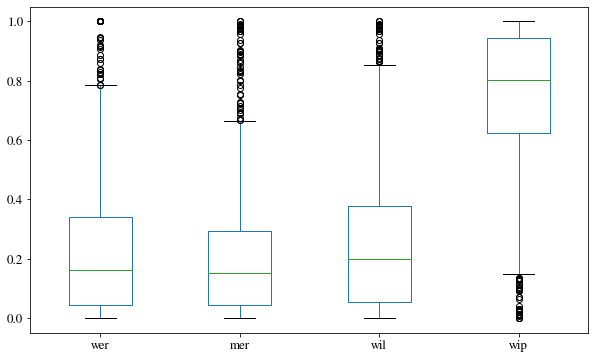

In [5]:
df[metrics].plot.box(figsize=(10, 6))

Text(0.5, 1.0, 'Word Information Preserved (WIP)')

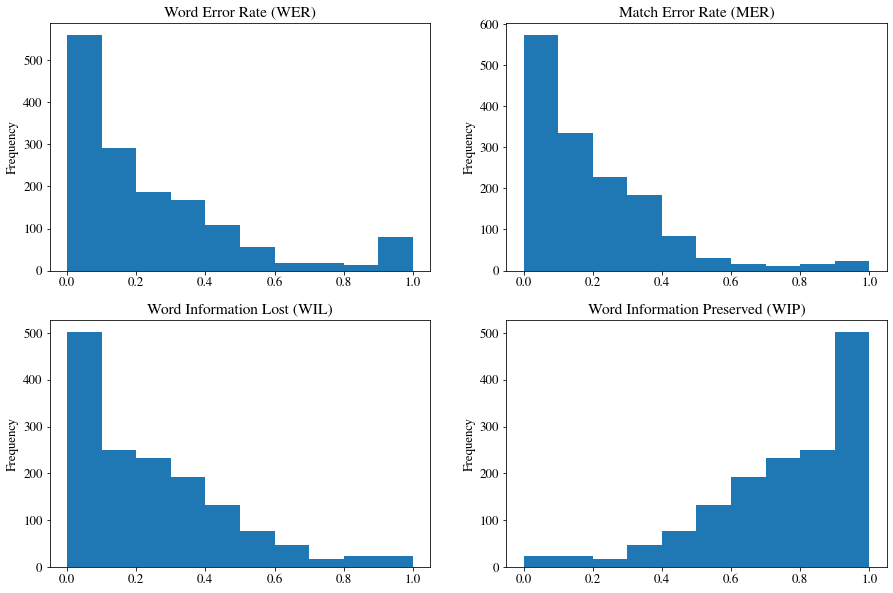

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df['wer'].plot.hist(ax=axes[0, 0])
df['mer'].plot.hist(ax=axes[0, 1])
df['wil'].plot.hist(ax=axes[1, 0])
df['wip'].plot.hist(ax=axes[1, 1])

axes[0, 0].set_title('Word Error Rate (WER)')
axes[0, 1].set_title('Match Error Rate (MER)')
axes[1, 0].set_title('Word Information Lost (WIL)')
axes[1, 1].set_title('Word Information Preserved (WIP)')

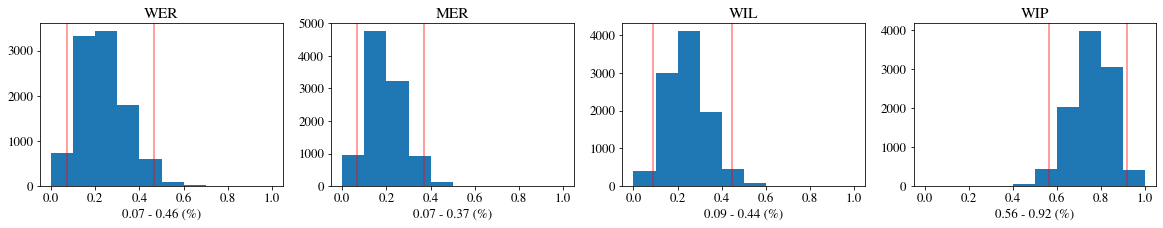

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(20, 3))

for i, metric in enumerate(metrics):
    sample = []
    for _ in range(10000):
        bootstrap = np.random.choice(df[metric], 6, replace=True)
        sample.append(bootstrap.mean())

    inf, sup = np.percentile(sample, 2.5) , np.percentile(sample, 97.5)
    label = f"{round(inf, 2)} - {round(sup, 2)} (%)"
    
    axes[i].hist(sample, range=(0, 1))
    axes[i].axvline(inf, color='r', alpha=0.5)
    axes[i].axvline(sup, color='r', alpha=0.5)
    
    axes[i].set_xlabel(label);
    axes[i].set_title(metric.upper());


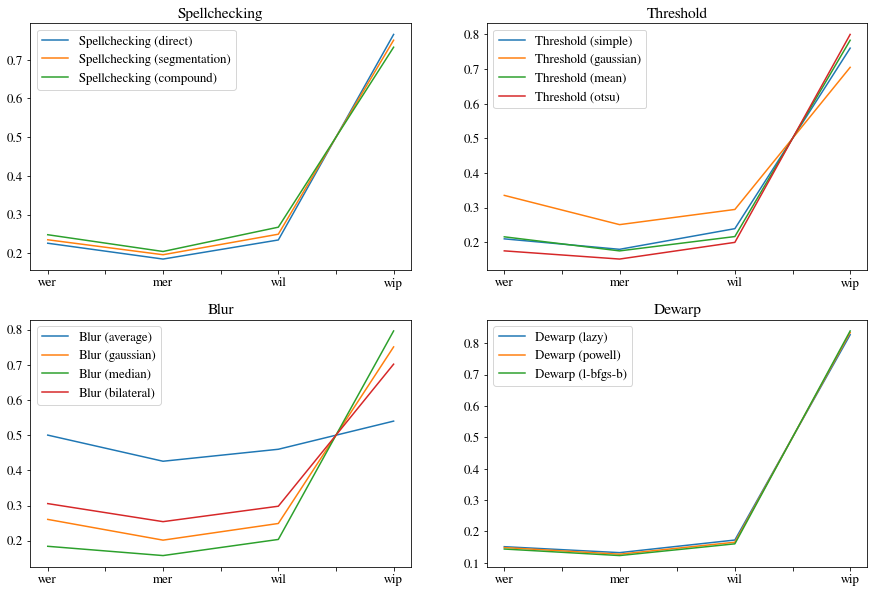

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(1, 4):
    df[metrics][i::15].mean().plot(ax=axes[0, 0])
    
for i in range(4, 8):
    df[metrics][i::15].mean().plot(ax=axes[0, 1])
    
for i in range(8, 12):
    df[metrics][i::15].mean().plot(ax=axes[1, 0])
    
for i in range(12, 15):
    df[metrics][i::15].mean().plot(ax=axes[1, 1])
    
axes[0, 0].set_title('Spellchecking')
axes[0, 1].set_title('Threshold')
axes[1, 0].set_title('Blur')
axes[1, 1].set_title('Dewarp')

axes[0, 0].legend(legends[1:4])
axes[0, 1].legend(legends[4:8])
axes[1, 0].legend(legends[8:12])
axes[1, 1].legend(legends[12:15])

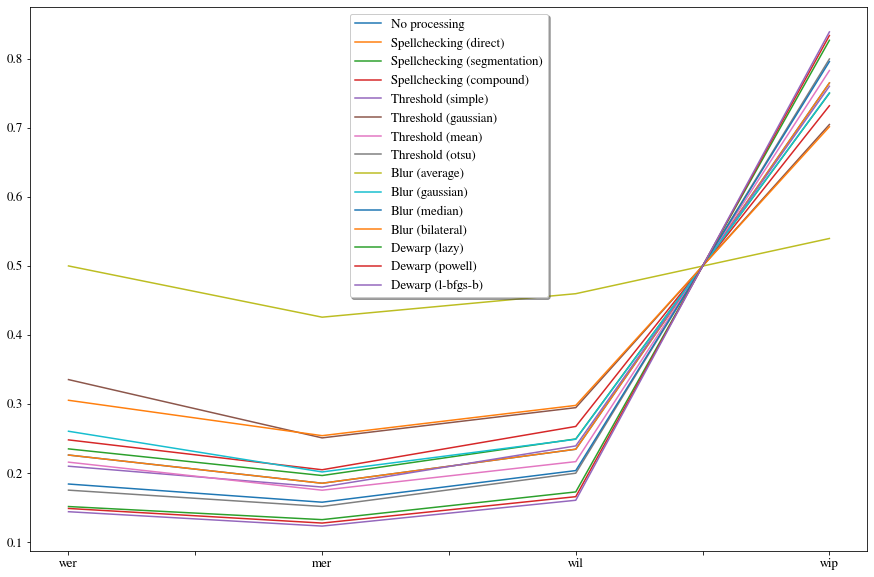

In [9]:
results = pd.DataFrame(columns=metrics_time)

for i in range(15):
    mean = df[metrics_time][i::15].mean().rename(legends[i])
    results = results.append(mean)
    mean[metrics].plot(figsize=(15, 10))
plt.legend(legends, fancybox=True, shadow=True)

# Final Results

In [10]:
filename2 = "../results/results2"
legends2 = ['Thresh (mean) + Blur (gaussian)', 'Thresh (mean) + Blur (median)', 'Thresh (otsu) + Blur (gaussian)',
            'Thresh (otsu) + Blur (median)', 'Thresh (mean) + Dewarp (lazy)', 'Thresh (mean) + Dewarp (powell)',
            'Thresh (mean) + Dewarp (l-bfgs-b)', 'Thresh (otsu) + Dewarp (lazy)', 'Thresh (otsu) + Dewarp (powell)',
            'Thresh (otsu) + Dewarp (l-bfgs-b)', 'Blur (gaussian) + Dewarp (lazy)', 'Blur (gaussian) + Dewarp (powell)',
            'Blur (gaussian) + Dewarp (l-bfgs-b)', 'Blur (median) + Dewarp (lazy)', 'Blur (median) + Dewarp (powell)',
            'Blur (median) + Dewarp (l-bfgs-b)', 'Thresh (mean) + Blur (gaussian) + Dewarp (lazy)',
            'Thresh (mean) + Blur (gaussian) + Dewarp (powell)', 'Thresh (mean) + Blur (gaussian) + Dewarp (l-bfgs-b)',
            'Thresh (mean) + Blur (median) + Dewarp (lazy)', 'Thresh (mean) + Blur (median) + Dewarp (powell)',
            'Thresh (mean) + Blur (median) + Dewarp (l-bfgs-b)', 'Thresh (otsu) + Blur (gaussian) + Dewarp (lazy)',
            'Thresh (otsu) + Blur (gaussian) + Dewarp (powell)', 'Thresh (otsu) + Blur (gaussian) + Dewarp (l-bfgs-b)',
            'Thresh (otsu) + Blur (median) + Dewarp (lazy)', 'Thresh (otsu) + Blur (median) + Dewarp (powell)',
            'Thresh (otsu) + Blur (median) + Dewarp (l-bfgs-b)']


In [11]:
df2 = pd.read_csv(filename2, names=columns, index_col=False)
df2.loc[df2.wer > 1, 'wer'] = 1

<AxesSubplot:>

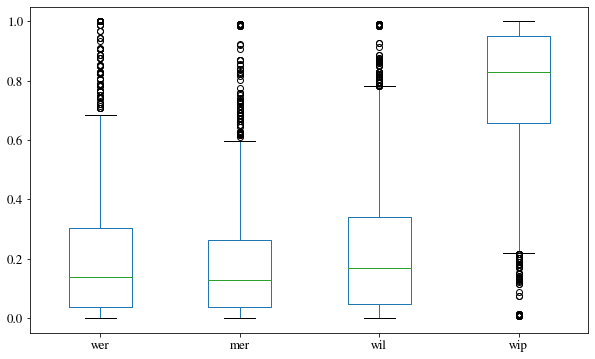

In [12]:
df2[metrics].plot.box(figsize=(10, 6))

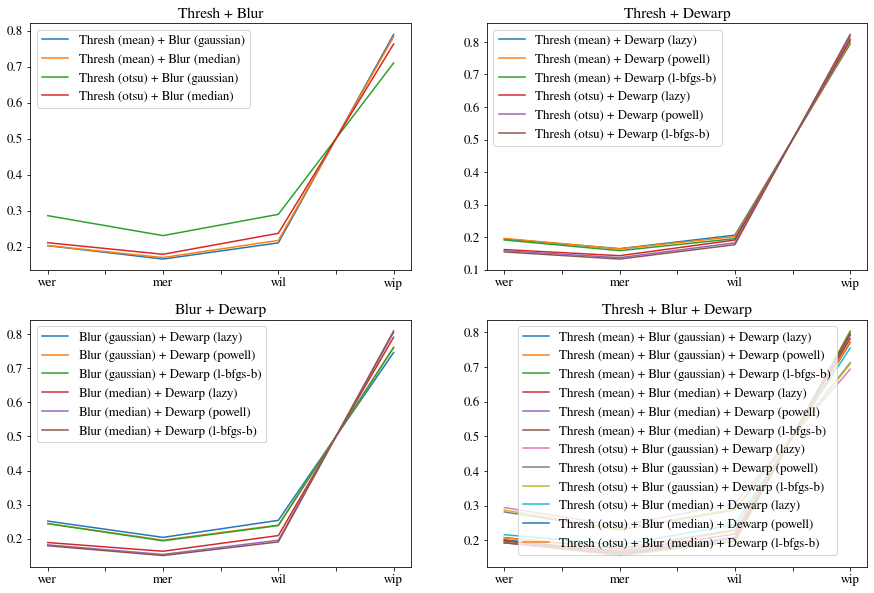

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(4):
    df2[metrics][i::28].mean().plot(ax=axes[0, 0])
    
for i in range(4, 10):
    df2[metrics][i::28].mean().plot(ax=axes[0, 1])
    
for i in range(10, 16):
    df2[metrics][i::28].mean().plot(ax=axes[1, 0])
    
for i in range(16, 28):
    df2[metrics][i::28].mean().plot(ax=axes[1, 1])
    
axes[0, 0].set_title('Thresh + Blur')
axes[0, 1].set_title('Thresh + Dewarp')
axes[1, 0].set_title('Blur + Dewarp')
axes[1, 1].set_title('Thresh + Blur + Dewarp')

axes[0, 0].legend(legends2[:4])
axes[0, 1].legend(legends2[4:10])
axes[1, 0].legend(legends2[10:16])
axes[1, 1].legend(legends2[16:28])

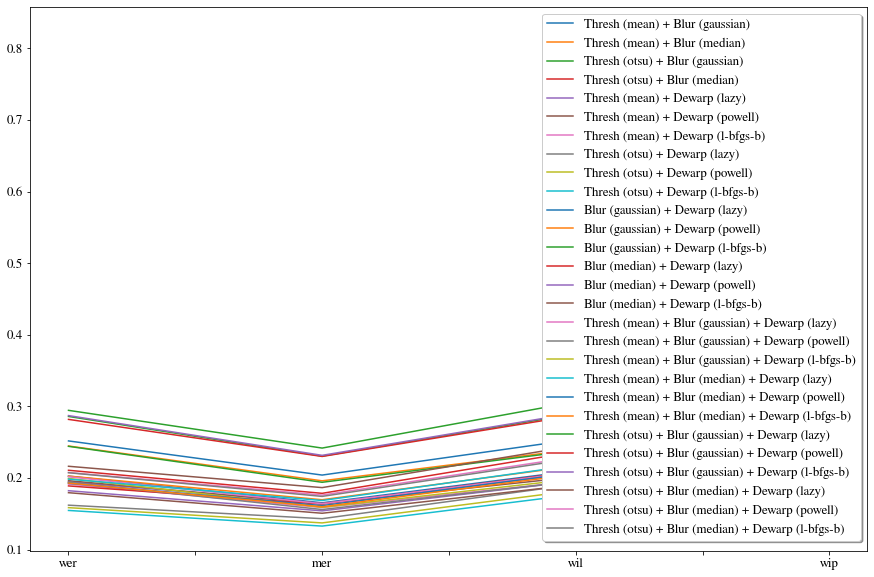

In [14]:
results2 = pd.DataFrame(columns=metrics_time)

for i in range(28):
    mean = df2[metrics_time][i::28].mean().rename(legends2[i])
    results2 = results2.append(mean)
    mean[metrics].plot(figsize=(15, 10))
plt.legend(legends2, fancybox=True, shadow=True)

Text(0.5, 1.0, 'Word Information Preserved (WIP)')

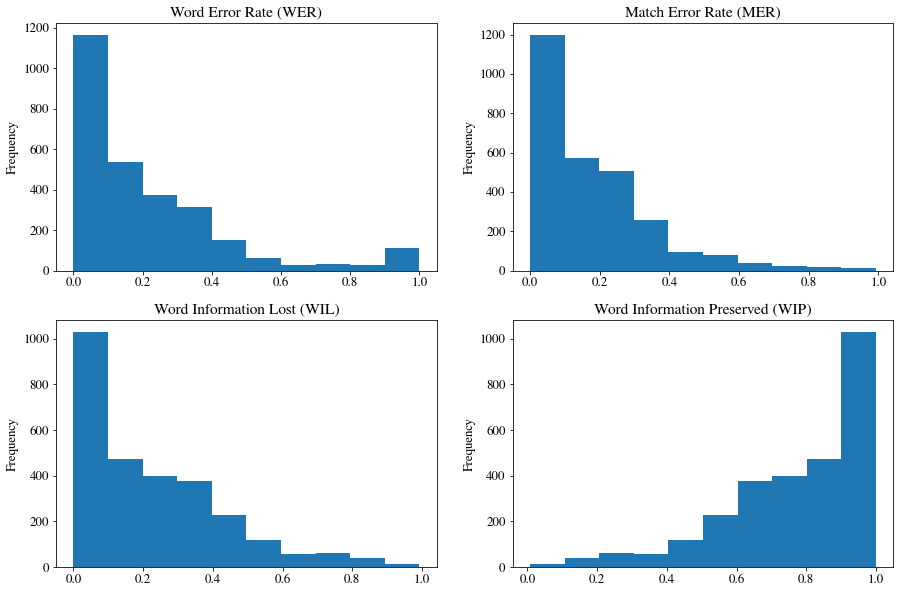

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df2['wer'].plot.hist(ax=axes[0, 0])
df2['mer'].plot.hist(ax=axes[0, 1])
df2['wil'].plot.hist(ax=axes[1, 0])
df2['wip'].plot.hist(ax=axes[1, 1])

axes[0, 0].set_title('Word Error Rate (WER)')
axes[0, 1].set_title('Match Error Rate (MER)')
axes[1, 0].set_title('Word Information Lost (WIL)')
axes[1, 1].set_title('Word Information Preserved (WIP)')

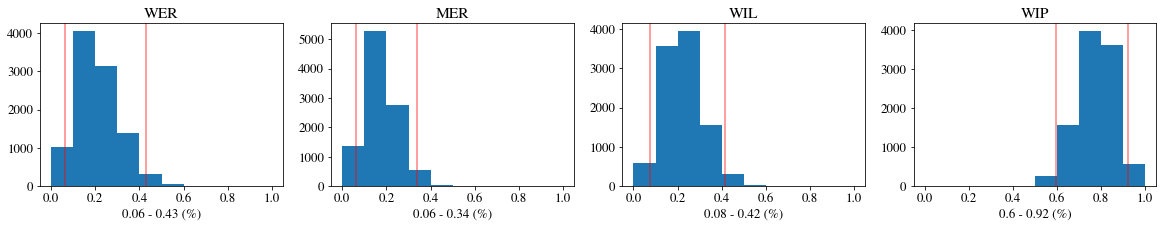

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(20, 3))

for i, metric in enumerate(metrics):
    sample = []
    for _ in range(10000):
        bootstrap = np.random.choice(df2[metric], 6, replace=True)
        sample.append(bootstrap.mean())

    inf, sup = np.percentile(sample, 2.5) , np.percentile(sample, 97.5)
    label = f"{round(inf, 2)} - {round(sup, 2)} (%)"
    
    axes[i].hist(sample, range=(0, 1))
    axes[i].axvline(inf, color='r', alpha=0.5)
    axes[i].axvline(sup, color='r', alpha=0.5)
    
    axes[i].set_xlabel(label);
    axes[i].set_title(metric.upper());

In [17]:
filename3 = "../results/results3"
legends3 = ['Thresh (simple) + Blur (gaussian)', 'Thresh (simple) + Blur (median)', 'Thresh (otsu) + Blur (gaussian)',
            'Thresh (otsu) + Blur (median)', 'Thresh (simple) + Dewarp (lazy)', 'Thresh (simple) + Dewarp (powell)',
            'Thresh (simple) + Dewarp (l-bfgs-b)', 'Thresh (otsu) + Dewarp (lazy)', 'Thresh (otsu) + Dewarp (powell)',
            'Thresh (otsu) + Dewarp (l-bfgs-b)', 'Blur (gaussian) + Dewarp (lazy)', 'Blur (gaussian) + Dewarp (powell)',
            'Blur (gaussian) + Dewarp (l-bfgs-b)', 'Blur (median) + Dewarp (lazy)', 'Blur (median) + Dewarp (powell)',
            'Blur (median) + Dewarp (l-bfgs-b)', 'Thresh (simple) + Blur (gaussian) + Dewarp (lazy)',
            'Thresh (simple) + Blur (gaussian) + Dewarp (powell)', 'Thresh (simple) + Blur (gaussian) + Dewarp (l-bfgs-b)',
            'Thresh (simple) + Blur (median) + Dewarp (lazy)', 'Thresh (simple) + Blur (median) + Dewarp (powell)',
            'Thresh (simple) + Blur (median) + Dewarp (l-bfgs-b)', 'Thresh (otsu) + Blur (gaussian) + Dewarp (lazy)',
            'Thresh (otsu) + Blur (gaussian) + Dewarp (powell)', 'Thresh (otsu) + Blur (gaussian) + Dewarp (l-bfgs-b)',
            'Thresh (otsu) + Blur (median) + Dewarp (lazy)', 'Thresh (otsu) + Blur (median) + Dewarp (powell)',
            'Thresh (otsu) + Blur (median) + Dewarp (l-bfgs-b)']

In [18]:
df3 = pd.read_csv(filename3, names=columns, index_col=False)
df3.loc[df3.wer > 1, 'wer'] = 1

<AxesSubplot:>

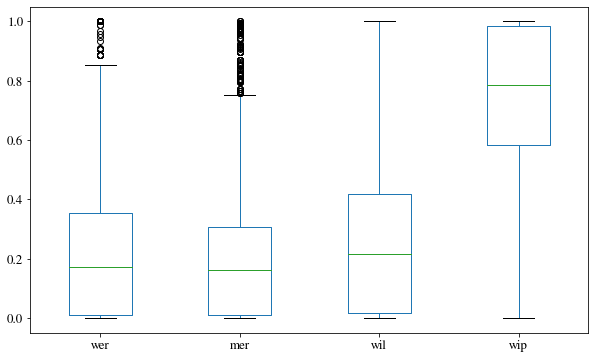

In [19]:
df3[metrics].plot.box(figsize=(10, 6))

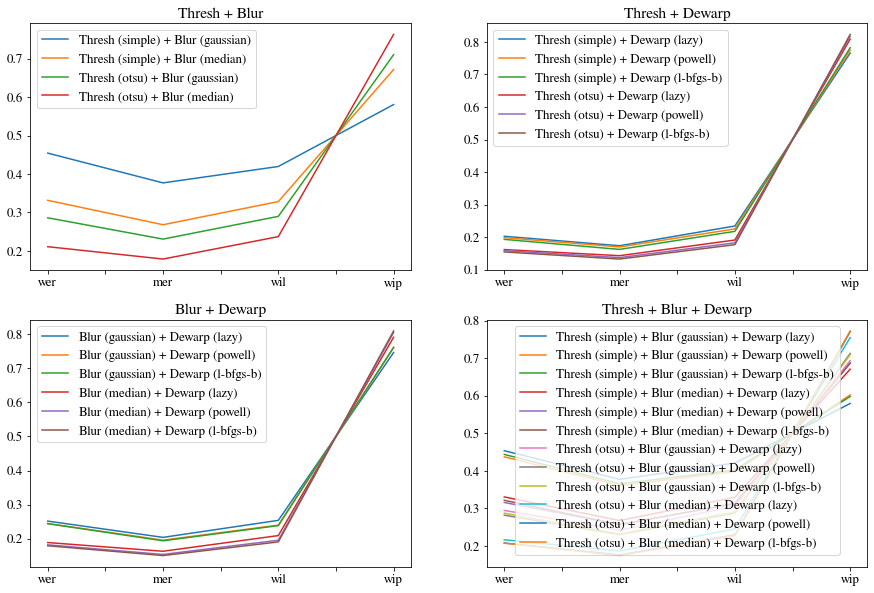

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(4):
    df3[metrics][i::28].mean().plot(ax=axes[0, 0])
    
for i in range(4, 10):
    df3[metrics][i::28].mean().plot(ax=axes[0, 1])
    
for i in range(10, 16):
    df3[metrics][i::28].mean().plot(ax=axes[1, 0])
    
for i in range(16, 28):
    df3[metrics][i::28].mean().plot(ax=axes[1, 1])
    
axes[0, 0].set_title('Thresh + Blur')
axes[0, 1].set_title('Thresh + Dewarp')
axes[1, 0].set_title('Blur + Dewarp')
axes[1, 1].set_title('Thresh + Blur + Dewarp')

axes[0, 0].legend(legends3[:4])
axes[0, 1].legend(legends3[4:10])
axes[1, 0].legend(legends3[10:16])
axes[1, 1].legend(legends3[16:28])

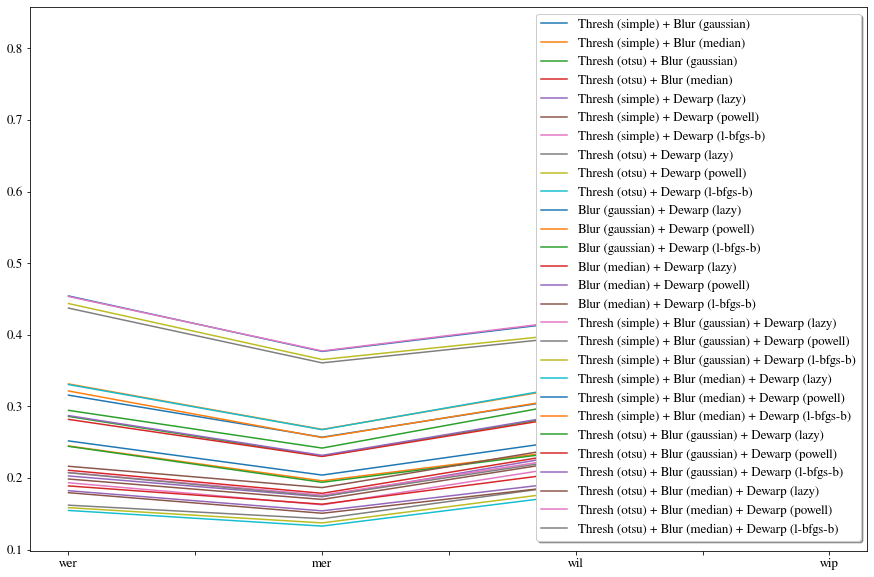

In [21]:
results3 = pd.DataFrame(columns=metrics_time)

for i in range(28):
    mean = df3[metrics_time][i::28].mean().rename(legends3[i])
    results3 = results3.append(mean)
    mean[metrics].plot(figsize=(15, 10))
plt.legend(legends3, fancybox=True, shadow=True)

Text(0.5, 1.0, 'Word Information Preserved (WIP)')

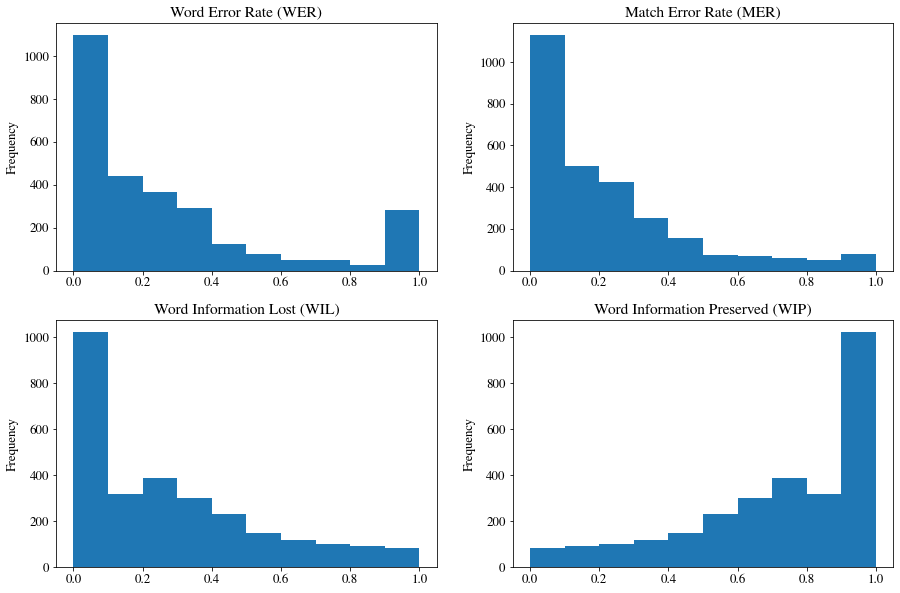

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df3['wer'].plot.hist(ax=axes[0, 0])
df3['mer'].plot.hist(ax=axes[0, 1])
df3['wil'].plot.hist(ax=axes[1, 0])
df3['wip'].plot.hist(ax=axes[1, 1])

axes[0, 0].set_title('Word Error Rate (WER)')
axes[0, 1].set_title('Match Error Rate (MER)')
axes[1, 0].set_title('Word Information Lost (WIL)')
axes[1, 1].set_title('Word Information Preserved (WIP)')

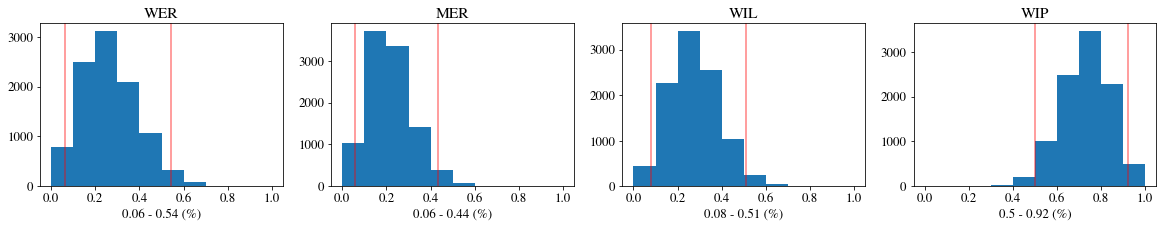

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(20, 3))

for i, metric in enumerate(metrics):
    sample = []
    for _ in range(10000):
        bootstrap = np.random.choice(df3[metric], 6, replace=True)
        sample.append(bootstrap.mean())

    inf, sup = np.percentile(sample, 2.5) , np.percentile(sample, 97.5)
    label = f"{round(inf, 2)} - {round(sup, 2)} (%)"
    
    axes[i].hist(sample, range=(0, 1))
    axes[i].axvline(inf, color='r', alpha=0.5)
    axes[i].axvline(sup, color='r', alpha=0.5)
    
    axes[i].set_xlabel(label);
    axes[i].set_title(metric.upper());


In [27]:
results

,wer,mer,wil,wip,time
No processing,0.226208,0.185330,0.234623,0.765377,4.412001
Spellchecking (direct),0.226208,0.185330,0.234623,0.765377,6.623613
Spellchecking (segmentation),0.235121,0.196513,0.249504,0.750496,7.545576
Spellchecking (compound),0.248157,0.204877,0.267646,0.732354,10.249377
Threshold (simple),0.209989,0.179808,0.239432,0.760568,3.773782
Threshold (gaussian),0.335522,0.251051,0.294870,0.705130,11.266695
Threshold (mean),0.215886,0.175243,0.216664,0.783336,9.364835
Threshold (otsu),0.175329,0.151675,0.199875,0.800125,3.936637
Blur (average),0.500221,0.425957,0.459999,0.540001,4.157694
Blur (gaussian),0.260668,0.201702,0.249051,0.750949,5.207639


In [25]:
results2

,wer,mer,wil,wip,time
Thresh (mean) + Blur (gaussian),0.202499,0.165247,0.210265,0.789735,6.818271
Thresh (mean) + Blur (median),0.202610,0.169508,0.217013,0.782987,6.887166
Thresh (otsu) + Blur (gaussian),0.285878,0.230431,0.289591,0.710409,3.584614
Thresh (otsu) + Blur (median),0.210686,0.178472,0.236878,0.763122,3.780539
Thresh (mean) + Dewarp (lazy),0.194523,0.164570,0.206077,0.793923,8.785942
Thresh (mean) + Dewarp (powell),0.196129,0.164127,0.201521,0.798479,14.033896
Thresh (mean) + Dewarp (l-bfgs-b),0.191341,0.158584,0.195390,0.804610,9.472495
Thresh (otsu) + Dewarp (lazy),0.161923,0.143054,0.191215,0.808785,4.132682
Thresh (otsu) + Dewarp (powell),0.158469,0.137148,0.182589,0.817411,9.418234
Thresh (otsu) + Dewarp (l-bfgs-b),0.154563,0.132704,0.176902,0.823098,4.826073


In [26]:
results3

,wer,mer,wil,wip,time
Thresh (simple) + Blur (gaussian),0.454232,0.376712,0.419401,0.580599,3.114003
Thresh (simple) + Blur (median),0.331317,0.267805,0.328113,0.671887,3.537774
Thresh (otsu) + Blur (gaussian),0.285878,0.230431,0.289591,0.710409,3.584916
Thresh (otsu) + Blur (median),0.210686,0.178472,0.236878,0.763122,3.778990
Thresh (simple) + Dewarp (lazy),0.202748,0.173653,0.234346,0.765654,3.977306
Thresh (simple) + Dewarp (powell),0.198465,0.169947,0.225397,0.774603,9.245332
Thresh (simple) + Dewarp (l-bfgs-b),0.193234,0.162380,0.217862,0.782138,4.677523
Thresh (otsu) + Dewarp (lazy),0.161923,0.143054,0.191215,0.808785,4.130153
Thresh (otsu) + Dewarp (powell),0.158469,0.137148,0.182589,0.817411,9.414457
Thresh (otsu) + Dewarp (l-bfgs-b),0.154563,0.132704,0.176902,0.823098,4.825217
